In [1]:
import numpy as np
from sympy import Symbol, solve
import matplotlib.pyplot as plt

In [5]:
def linear_equations_image():# 2D Linear Equation: y = 2x + 3
    x_2d = np.linspace(-10, 10, 100)
    y_2d = 2 * x_2d + 3
    
    fig = plt.figure(figsize=(12, 6))
    
    ax1 = fig.add_subplot(121)
    ax1.plot(x_2d, y_2d, label="y = 2x + 3", color="blue")
    ax1.axhline(0, color="black", linewidth=0.5)
    ax1.axvline(0, color="black", linewidth=0.5)
    ax1.grid(True, linestyle="--", linewidth=0.5)
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_title("2D Linear Equation: $y = 2x + 3$")
    ax1.legend()
    
    
    x_3d = np.linspace(-10, 10, 20)
    y_3d = np.linspace(-10, 10, 20)
    X, Y = np.meshgrid(x_3d, y_3d)
    Z = 2 * X + 3 * Y + 5
    
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(X, Y, Z, cmap="viridis", alpha=0.7)
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    ax2.set_zlabel("z")
    ax2.set_title("3D Linear Equation: $z = 2x + 3y + 5$")
    
    plt.tight_layout()
    plt.savefig("linear_equations.png", transparent=True)
    plt.show()

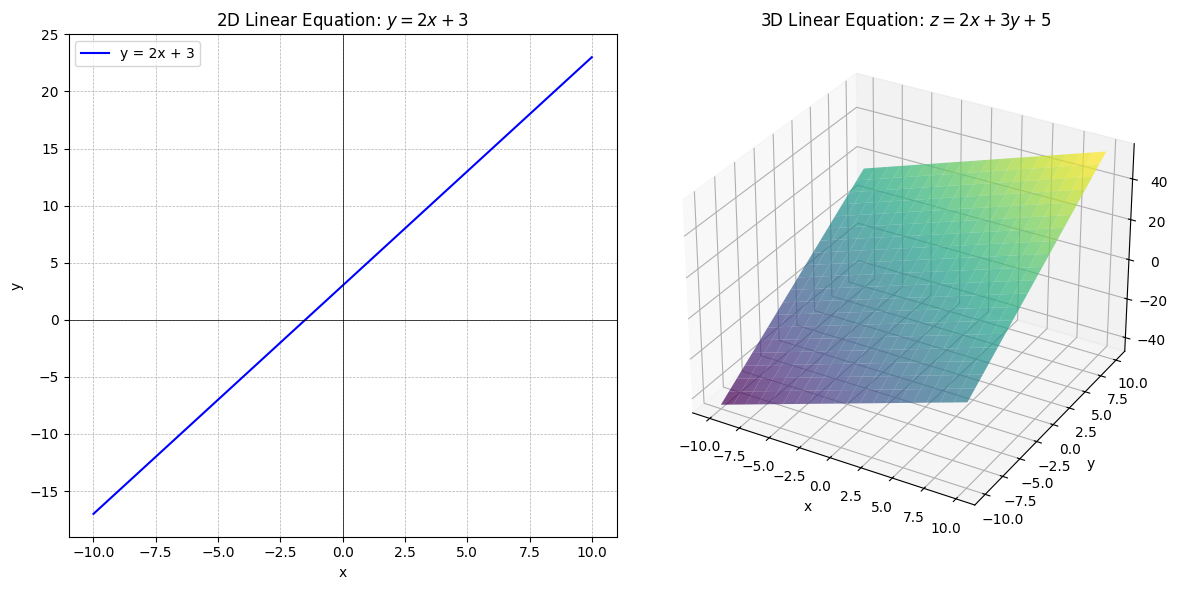

In [6]:
linear_equations_image()

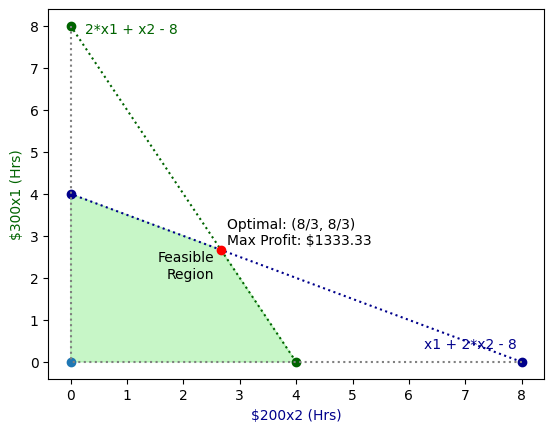

In [7]:
def get_bound(x1, x2, limit):
    x_1 = [limit/x1, 0.0]
    x_2 = [0.0, limit/x2]
    return x_1, x_2


def plot_solution(b1_x1, b1_x2, max_hrs_x1, x1_profit, b2_x1, b2_x2, max_hrs_x2, x2_profit):
    # Create variables x1 and x2, via SymPy.
    s1 = Symbol('x1')
    s2 = Symbol('x2')

    # Get bounds (points) for constraints.
    x1, y1 = get_bound(b1_x1, b1_x2, max_hrs_x1)
    x2, y2 = get_bound(b2_x1, b2_x2, max_hrs_x2)

    # Define constraint formulas.
    constraint1 = b1_x1*s1 + b1_x2*s2 - max_hrs_x1
    constraint2 = b2_x1*s1 + b2_x2*s2 - max_hrs_x2

    # Solve for constraints.
    soln = solve((constraint1, constraint2), dict=True)[0]
    intersect_x = soln[s1]
    intersect_y = soln[s2]

    # Define objective function.
    max_profit_formula = x1_profit*s1 + x2_profit*s2

    # Final Solution - maximize profit.
    max_profit = float(max_profit_formula.subs({'x1': intersect_x, 'x2': intersect_y}))

    # Plot the first constraint.
    plt.plot(x1, y1, linestyle=':', marker='o', color='darkgreen')
    # Label with constraint formula.
    plt.annotate(
        constraint1,
        (0, max_hrs_x1),
        textcoords="offset points",
        xytext=(10, -5),
        ha='left',
        color='darkgreen'
    )

    # Plot the second constraint.
    plt.plot(x2, y2, linestyle=':', marker='o', color='darkblue')
    # Label with constraint formula.
    plt.annotate(
        constraint2,
        (max_hrs_x2, 0),
        textcoords="offset points",
        xytext=(-70, 10),
        ha='left',
        color='darkblue'
    )

    # Plot bounds for x1 >= 0 and x2 >= 0.
    plt.plot(0,0, marker='o')
    plt.plot([0, 0], [max_hrs_x1, 0], linestyle=':', color='grey')
    plt.plot([max_hrs_x2, 0], [0, 0], linestyle=':', color='grey')

    # Fill Feasible Region
    plt.fill(
        [0, 0, intersect_x, x1[0]],
        [0, y2[1], intersect_y, 0],
        color='lightgreen', alpha=0.5
    )

    # Plot point for maximum profit.
    plt.plot(intersect_x, intersect_y, marker='o', color='red')
    # Plot labels for maximum profit.
    plt.annotate(
        f"Optimal: ({intersect_x}, {intersect_y})\nMax Profit: ${max_profit:0.2f}",
        (intersect_x, intersect_y),
        textcoords="offset points",
        xytext=(4,4),
        ha='left')
    plt.annotate(
        "Feasible\nRegion",
        (intersect_x, intersect_y),
        textcoords="offset points",
        xytext=(-5,-20), ha='right'
    )
    # Draw X and Y axis labels.
    plt.xlabel(f"${x2_profit}x2 (Hrs)", color='darkblue')
    plt.ylabel(f"${x1_profit}x1 (Hrs)", color='darkgreen')
    plt.savefig("feasible_solution_2d.svg", transparent=True)
    # Render plot.
    plt.show()


# Define decision variables as profit per product.
x1_profit = 300
x2_profit = 200
b1_x1 = 2; b1_x2 = 1; max_hrs_x1 = 8
b2_x1 = 1; b2_x2 = 2; max_hrs_x2 = 8

# Test our plot.
plot_solution(b1_x1, b1_x2, max_hrs_x1, x1_profit, b2_x1, b2_x2, max_hrs_x2, x2_profit)